In [1]:
import pandas as pd
import sys
sys.path.append("../")
from tcad.tools.nntools import SmilesDataSet, SmilesEncoder
from tcad.deep.fit import train_gan
from torch.utils.data import DataLoader
from tcad.deep.models import GAN
import matplotlib.pyplot as plt
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

smiles_dataset = SmilesDataSet(smiles, gan=True)
senc = SmilesEncoder(smiles, gan=True)
dataloader = DataLoader(smiles_dataset, batch_size=128)

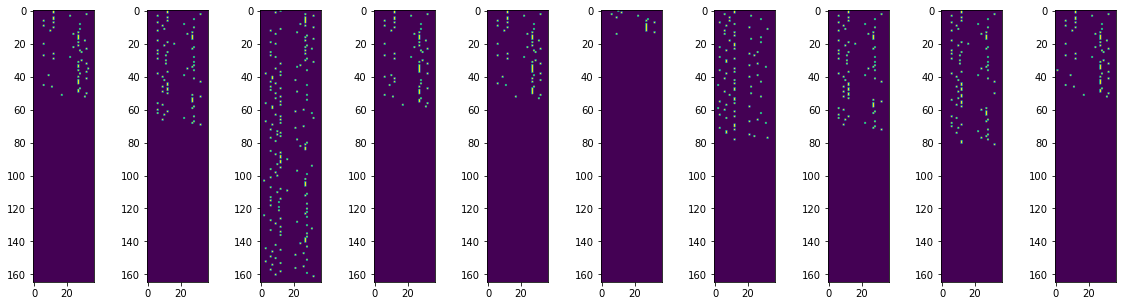

In [3]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(smiles_dataset[i].squeeze())

In [4]:
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

model = GAN(240).to(DEVICE)

optim_gen = torch.optim.Adam(model.generator.parameters(),
                             betas=(0.5, 0.999),
                             lr=GENERATOR_LEARNING_RATE)

optim_discr = torch.optim.Adam(model.discriminator.parameters(),
                               betas=(0.5, 0.999),
                               lr=DISCRIMINATOR_LEARNING_RATE)

In [28]:
train_gan(dataloader, model, optim_gen, optim_discr, loss_func="wasserstein", epochs=200)

Epoch: 0 Discriminator loss: -0.06533478024903772 Generator loss: 1.1580349665827456
Epoch: 10 Discriminator loss: -0.05254078685006569 Generator loss: 0.7424693635196928
Epoch: 20 Discriminator loss: -0.04062107897261952 Generator loss: 1.0291556858149016
Epoch: 30 Discriminator loss: -0.02052485697711351 Generator loss: 0.5028481681643451
Epoch: 40 Discriminator loss: -0.0053240352822147285 Generator loss: 0.4758958776205807
Epoch: 50 Discriminator loss: -0.0032834814156286196 Generator loss: 0.6318407930748768
Epoch: 60 Discriminator loss: -0.010259200434769078 Generator loss: 0.6445247014070564
Epoch: 70 Discriminator loss: -0.04097764641486096 Generator loss: 0.7126862096751333
Epoch: 80 Discriminator loss: -0.027728886883284565 Generator loss: 0.7242404571793893
Epoch: 90 Discriminator loss: -0.014162175552214384 Generator loss: 0.43096666513349685
Epoch: 100 Discriminator loss: -0.040809427695522815 Generator loss: 0.8039003250052678
Epoch: 110 Discriminator loss: -0.02581619230

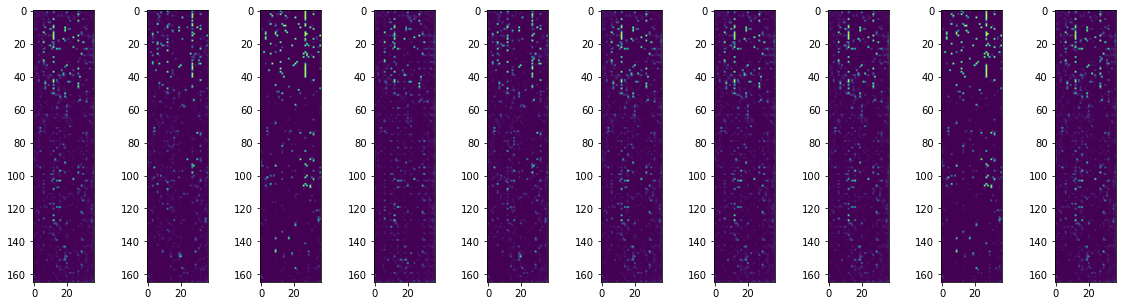

In [36]:
noise = torch.randn(240, model.latent_dim, device=DEVICE)

out = model.generator_forward(noise).detach().cpu().numpy().squeeze()

_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(out[i])